# **1. Overview**

### **Context :** 
Banks need to protect their interest before it can take risk on you and issue credit card to you. Banks use their previous credit card holders records for understanding the patterns of the card holders. It is a lot more complex process to predict whether a person who they do not know at personal level, will be a defaulter or not. Banks, along with the data from their own records, also use CIBIL data.
Based on all this data, banks want to develop a pattern that will tell them who are likely to be a defaulter and who are not.

### **Attribute Information :** 
The dataset has 13 features with 50636 observations. The features are:

Here <b>age, gender</b> are the age and gender of the card holder.<br>
<b>education</b> is the last acquired educational qualification of the card holder.<br>
<b>occupation</b> can be salaried, or self employed or business etc. <br>
<b>organization_type</b> can be tire 1, 2, 3 etc.<br> 
<b>seniority</b> denotes at which career level the card holder is in.<br> 
<b>annual_income</b> is the gross annual income of the card holder.<br> 
<b>disposable_income</b> is annual income - recurring expenses.<br> 
<b>house_type</b> is owned or rented or company provided etc.<br> 
<b>vehicle_type</b> is 4-wheeler or two-wheeler or none.<br> 
<b>marital_status</b> is of the card holder.<br> 
<b>no_card</b> has the information of the number of other credit cards that the card holder already holds. <br>
And at the end of each row, we have a <b>defaulter</b> indicator indicating whether the card holder was a defaulter or not. It is 1 if the card holder was a defaulter, 0 otherwise.
### **Objective :**
We have to use this dataset to generate a classification model that can successfully predict for a new applicant with recorded data for given parameters in the data set, if he is likely to be a defaulter.

# **2. Import Libraries:**

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import KFold
from datetime import datetime
import warnings

# **3. Load Dataset:**

In [2]:
# Load the dataset
credit_df=pd.read_csv("credit_data.csv")
credit_df.head()

,age,gender,education,occupation,organization_type,seniority,annual_income,disposable_income,house_type,vehicle_type,marital_status,no_card,default
0,19,Male,Graduate,Professional,None,None,186319,21625,Family,None,Married,0,1
1,18,Male,Under Graduate,Professional,None,None,277022,20442,Rented,None,Married,0,1
2,29,Male,Under Graduate,Salaried,None,Entry,348676,24404,Rented,None,Married,1,1
3,18,Male,Graduate,Student,None,None,165041,2533,Rented,None,Married,0,1
4,26,Male,Post Graduate,Salaried,None,Mid-level 1,348745,19321,Rented,None,Married,1,1


# **4. Exploratory Data Analysis**

In [3]:
credit_df.shape

(50636, 13)

In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50636 entries, 0 to 50635
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                50636 non-null  int64 
 1   gender             50636 non-null  object
 2   education          50636 non-null  object
 3   occupation         50636 non-null  object
 4   organization_type  50636 non-null  object
 5   seniority          50636 non-null  object
 6   annual_income      50636 non-null  int64 
 7   disposable_income  50636 non-null  int64 
 8   house_type         50636 non-null  object
 9   vehicle_type       50636 non-null  object
 10  marital_status     50636 non-null  object
 11  no_card            50636 non-null  int64 
 12  default            50636 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 5.0+ MB


In [5]:
# check for null values
credit_df.isnull().sum()

age                  0
gender               0
education            0
occupation           0
organization_type    0
seniority            0
annual_income        0
disposable_income    0
house_type           0
vehicle_type         0
marital_status       0
no_card              0
default              0
dtype: int64

In [6]:
# see the statistical analysis of the dataset
credit_df.describe()

,age,annual_income,disposable_income,no_card,default
count,50636.000000,50636.000000,50636.000000,50636.000000,50636.000000
mean,29.527411,277243.989889,18325.788569,0.509815,0.158425
std,8.816532,153838.973755,12677.864844,0.669883,0.365142
min,18.000000,50000.000000,1000.000000,0.000000,0.000000
25%,25.000000,154052.250000,8317.750000,0.000000,0.000000
50%,27.000000,258860.500000,15770.000000,0.000000,0.000000
75%,30.000000,385071.500000,24135.000000,1.000000,0.000000
max,64.000000,999844.000000,49999.000000,2.000000,1.000000


In [7]:
# Separate columns having categorical value
obj_df=credit_df.select_dtypes(include=['object']).copy()
obj_df.head()

,gender,education,occupation,organization_type,seniority,house_type,vehicle_type,marital_status
0,Male,Graduate,Professional,None,None,Family,None,Married
1,Male,Under Graduate,Professional,None,None,Rented,None,Married
2,Male,Under Graduate,Salaried,None,Entry,Rented,None,Married
3,Male,Graduate,Student,None,None,Rented,None,Married
4,Male,Post Graduate,Salaried,None,Mid-level 1,Rented,None,Married


In [8]:
# find unique values present in "no_card" column
credit_df['no_card'].value_counts()

0    29855
1    15747
2     5034
Name: no_card, dtype: int64

Here we saw that column **'no_card'** has categorical values but the values are integer. So we'd add that column to the **obj_df** dataframe.

In [9]:
# add column "no_card" to the dataframe "obj_df"
obj_df['no_card']=credit_df['no_card']

In [10]:
obj_df.head()

,gender,education,occupation,organization_type,seniority,house_type,vehicle_type,marital_status,no_card
0,Male,Graduate,Professional,None,None,Family,None,Married,0
1,Male,Under Graduate,Professional,None,None,Rented,None,Married,0
2,Male,Under Graduate,Salaried,None,Entry,Rented,None,Married,1
3,Male,Graduate,Student,None,None,Rented,None,Married,0
4,Male,Post Graduate,Salaried,None,Mid-level 1,Rented,None,Married,1


In [11]:
obj_df.columns

Index(['gender', 'education', 'occupation', 'organization_type', 'seniority',
       'house_type', 'vehicle_type', 'marital_status', 'no_card'],
      dtype='object')

In [12]:
# Find number of unique value present in all columns
obj_df.nunique()

gender               2
education            4
occupation           4
organization_type    4
seniority            6
house_type           4
vehicle_type         3
marital_status       3
no_card              3
dtype: int64

In [13]:
def find_unique(col):
  print(col,":",obj_df[col].unique())
for col in obj_df.columns:
  find_unique(col)

gender : ['Male' 'Female']
education : ['Graduate' 'Under Graduate' 'Post Graduate' 'Other']
occupation : ['Professional' 'Salaried' 'Student' 'Business']
organization_type : ['None' 'Tier 3' 'Tier 2' 'Tier 1']
seniority : ['None' 'Entry' 'Mid-level 1' 'Junior' 'Mid-level 2' 'Senior']
house_type : ['Family' 'Rented' 'Company provided' 'Owned']
vehicle_type : ['None' 'Two Wheeler' 'Four Wheeler']
marital_status : ['Married' 'Single' 'Other']
no_card : [0 1 2]


# **5. Data Visualization**

**Frequency distribution of columns having categorical values**

In [14]:
def plot_bar_graph(column_name):
    ed_count = column_name.value_counts()
    sns.set(style="darkgrid")
    sns.barplot(ed_count.index, ed_count.values, alpha=0.9)
    plt.title('Frequency Distribution of {} Levels using Bar Plot'.format(column_name.name))
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('{}'.format(column_name.name), fontsize=12)
    plt.show() 
    

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


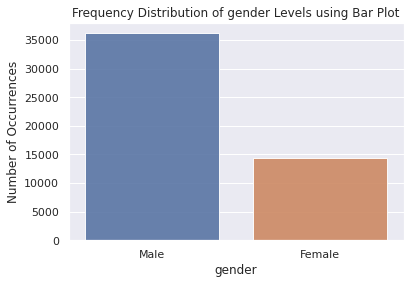

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


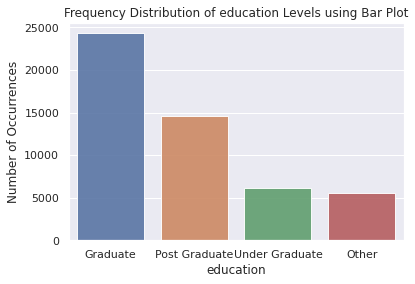

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


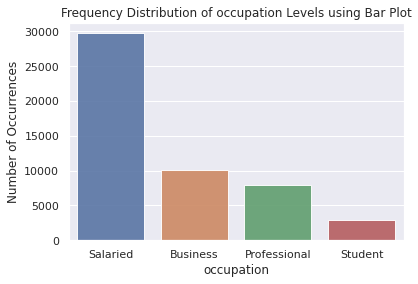

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


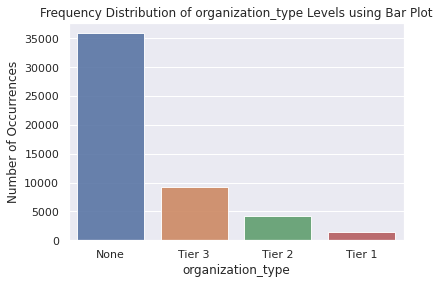

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


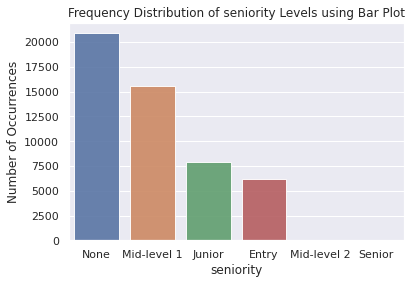

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


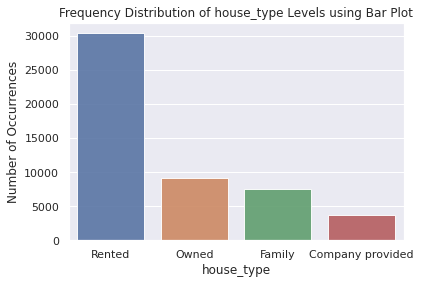

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


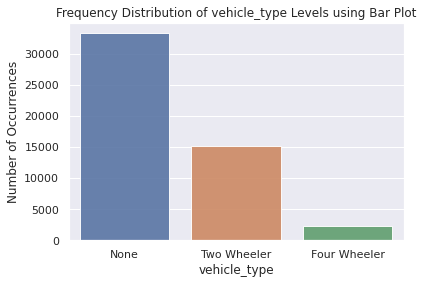

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


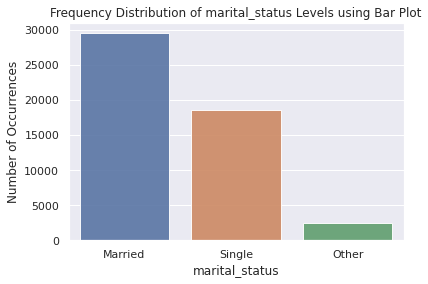

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


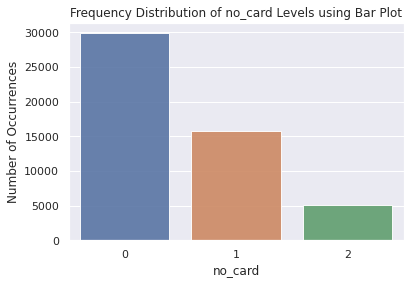

In [15]:
for i in obj_df.columns:
  plot_bar_graph(obj_df[i])

In [16]:
numeric_df=credit_df.select_dtypes(include=['int64']).copy()
numeric_df.drop(columns=['no_card','default'],axis=1,inplace=True)
numeric_df.head()

,age,annual_income,disposable_income
0,19,186319,21625
1,18,277022,20442
2,29,348676,24404
3,18,165041,2533
4,26,348745,19321


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


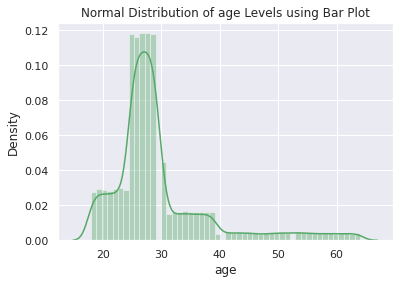

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


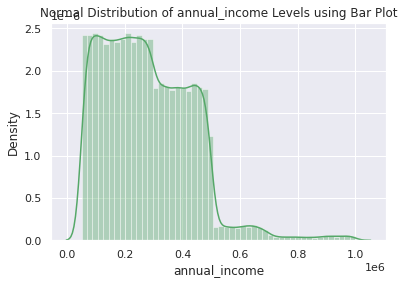

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


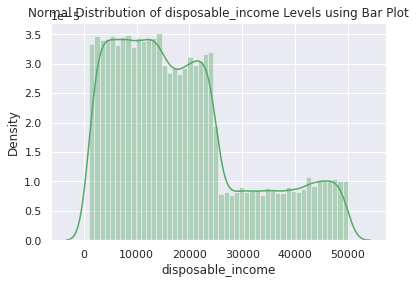

In [17]:
def distplot_graph(column_name):
    sns.set(style="darkgrid")
    sns.distplot(numeric_df[column_name], color="g")
    plt.title('Normal Distribution of {} Levels using Bar Plot'.format(column_name))    
    plt.xlabel('{}'.format(column_name), fontsize=12)
    plt.show() 
    
for col in numeric_df.columns:
  distplot_graph(col)

# **6. Data Preprocessing**

In [18]:
# encode the categorical values into numeric values
le=LabelEncoder()
for col in obj_df.columns:
    credit_df[col]=le.fit_transform(credit_df[col])
credit_df.head()

,age,gender,education,occupation,organization_type,seniority,annual_income,disposable_income,house_type,vehicle_type,marital_status,no_card,default
0,19,1,0,1,0,4,186319,21625,1,1,0,0,1
1,18,1,3,1,0,4,277022,20442,3,1,0,0,1
2,29,1,3,2,0,0,348676,24404,3,1,0,1,1
3,18,1,0,3,0,4,165041,2533,3,1,0,0,1
4,26,1,2,2,0,2,348745,19321,3,1,0,1,1


### **6.1. Outlier Detection**

In [19]:
# find outlier in all columns
for i in credit_df.select_dtypes(include=['float64','int64']).columns:
  max_thresold=credit_df[i].quantile(0.95)
  min_thresold=credit_df[i].quantile(0.05)
  credit_df_no_outlier=credit_df[(credit_df[i] < max_thresold) & (credit_df[i] > min_thresold)].shape
  print(" outlier in ",i,"is" ,int(((credit_df.shape[0]-credit_df_no_outlier[0])/credit_df.shape[0])*100),"%")

 outlier in  age is 10 %
 outlier in  gender is 100 %
 outlier in  education is 60 %
 outlier in  occupation is 25 %
 outlier in  organization_type is 88 %
 outlier in  seniority is 53 %
 outlier in  annual_income is 10 %
 outlier in  disposable_income is 10 %
 outlier in  house_type is 67 %
 outlier in  vehicle_type is 100 %
 outlier in  marital_status is 95 %
 outlier in  no_card is 68 %
 outlier in  default is 100 %


In [20]:
# remove outliers from columns having nearly 10% outlier
max_thresold_annual_income=credit_df["annual_income"].quantile(0.95)
min_thresold_annual_income=credit_df["annual_income"].quantile(0.05)
max_thresold_disposable_income=credit_df["disposable_income"].quantile(0.95)
min_thresold_disposable_income=credit_df["disposable_income"].quantile(0.05)
credit_df_no_outlier=credit_df[(credit_df["annual_income"] < max_thresold_annual_income) & (credit_df["annual_income"] > min_thresold_annual_income) &  (credit_df["disposable_income"] < max_thresold_disposable_income) & (credit_df["disposable_income"] > min_thresold_disposable_income)]


In [21]:
credit_df_no_outlier.head()

,age,gender,education,occupation,organization_type,seniority,annual_income,disposable_income,house_type,vehicle_type,marital_status,no_card,default
0,19,1,0,1,0,4,186319,21625,1,1,0,0,1
1,18,1,3,1,0,4,277022,20442,3,1,0,0,1
2,29,1,3,2,0,0,348676,24404,3,1,0,1,1
3,18,1,0,3,0,4,165041,2533,3,1,0,0,1
4,26,1,2,2,0,2,348745,19321,3,1,0,1,1


In [22]:
credit_df_no_outlier.reset_index(inplace=True)
credit_df_no_outlier.head()

,index,age,gender,education,occupation,organization_type,seniority,annual_income,disposable_income,house_type,vehicle_type,marital_status,no_card,default
0,0,19,1,0,1,0,4,186319,21625,1,1,0,0,1
1,1,18,1,3,1,0,4,277022,20442,3,1,0,0,1
2,2,29,1,3,2,0,0,348676,24404,3,1,0,1,1
3,3,18,1,0,3,0,4,165041,2533,3,1,0,0,1
4,4,26,1,2,2,0,2,348745,19321,3,1,0,1,1


In [23]:
credit_df_no_outlier=credit_df_no_outlier.drop(columns=["index"],axis=1)
credit_df_no_outlier.head()

,age,gender,education,occupation,organization_type,seniority,annual_income,disposable_income,house_type,vehicle_type,marital_status,no_card,default
0,19,1,0,1,0,4,186319,21625,1,1,0,0,1
1,18,1,3,1,0,4,277022,20442,3,1,0,0,1
2,29,1,3,2,0,0,348676,24404,3,1,0,1,1
3,18,1,0,3,0,4,165041,2533,3,1,0,0,1
4,26,1,2,2,0,2,348745,19321,3,1,0,1,1


### **6.2. Checking Data Correlation**

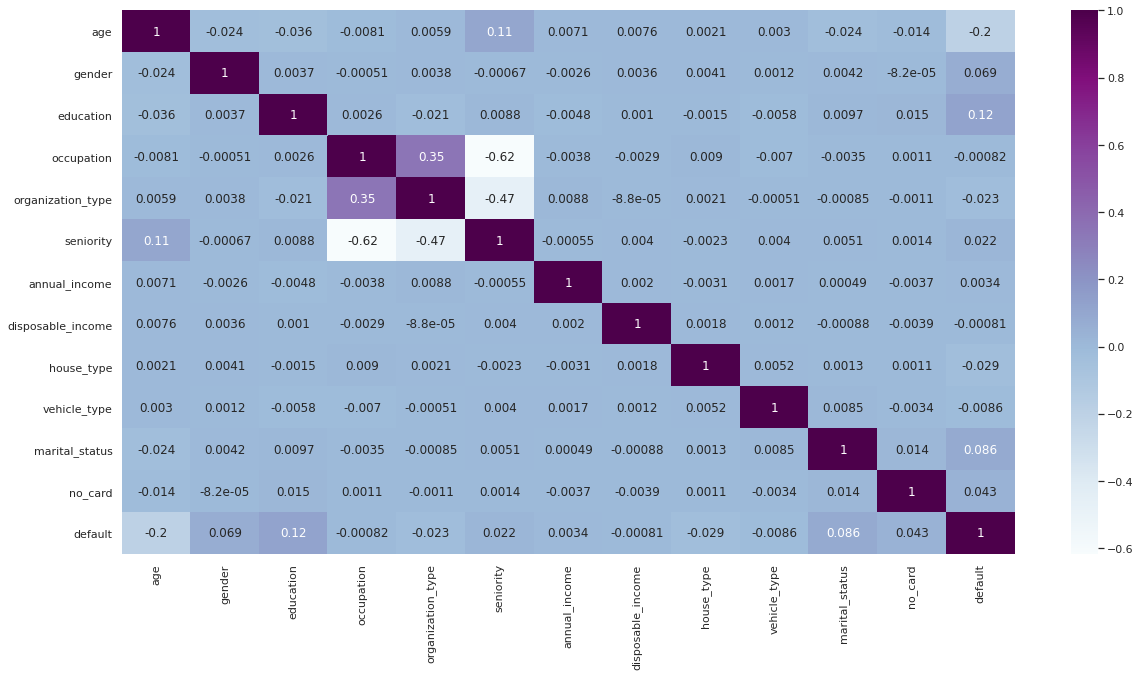

In [24]:
# correlation matrix of DataFrame
plt.figure(figsize=(20,10))
corn=credit_df_no_outlier.corr()
sns.heatmap(corn,annot=True,cmap="BuPu")

In [25]:
X=credit_df_no_outlier.drop(columns=["default"])
y=credit_df_no_outlier["default"]

In [26]:
# scale the DataFrame
scalar=StandardScaler()
X=scalar.fit_transform(X)
X=pd.DataFrame(X)

# **7. Split the dataset**

Here before going for <code>hyper-parameter</code> tuning we'll apply <code>LazyClassifier</code> algorithm to find which algorithm will give how much of accuracy.

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=21)

In [28]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(30985, 12) (30985,)
(10329, 12) (10329,)


# **8. Apply Lazypredict**

As the dataset is too big when we apply <code>LazyClassifier</code> algorithm our execution may crash due to less RAM. Google colab provides 12gb RAM for free but to execute this algorithm with big dataset we need more RAM. So i'm using Google colab pro to execute this algorithm. Don't worry if you have not Colab pro. I'll provide the output in a csv file.

In [29]:
!pip install lazypredict==0.2.7

In [30]:
!pip install lightgbm

In [31]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [32]:
clf= LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
train,test=clf.fit(x_train,x_test,y_train,y_test)

100%|██████████| 30/30 [02:34<00:00,  5.15s/it]


In [33]:
train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.62,0.64,0.64,0.67,0.06
LGBMClassifier,0.86,0.63,0.63,0.84,0.49
RandomForestClassifier,0.86,0.62,0.62,0.83,3.53
XGBClassifier,0.86,0.61,0.61,0.83,2.18
DecisionTreeClassifier,0.78,0.61,0.61,0.79,0.23
BaggingClassifier,0.85,0.60,0.60,0.82,1.12
AdaBoostClassifier,0.86,0.60,0.60,0.83,1.15
ExtraTreesClassifier,0.85,0.60,0.60,0.82,2.49
ExtraTreeClassifier,0.78,0.59,0.59,0.78,0.05


NOTE: If the execution got failed or crashed then run the below cell to see the output of upper cells and make comment the above five cells

In [34]:
#  all_algorithm_df=pd.read_csv("lazypredict_algo.csv")
#  all_algorithm_df

# **9. Hyperparameter Tuning**

In [35]:
# this code is to show how much time required to train the model using different algorithms
def timer(start_time= None):
  if not start_time:
    start_time=datetime.now()
    return start_time
  elif start_time:
    thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
    tmin,tsec=divmod(temp_sec,60)
    print('\n Time taken: %i hours %i minutes and %s seconds. '% (thour,tmin,round(tsec,2)))

In [36]:
# parameters of all classification algorithms respectively
model_param={    
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[100,1000]
        }
    },
    'LGBMClassifier':{
        'model':lgb.LGBMClassifier(),
        'params':{
            'max_depth': [20, 30],
            'max_bin':[255,300],                      
            'n_estimators' : [10,100,1000]
        }
    },
    'ExtraTreesClfr':{
        'model':ExtraTreesClassifier(),
        'params':{
            "max_depth": [None],
            "max_features": [8,12],
            "min_samples_split": [10,20,30],
            "bootstrap": [False, True],
            "n_estimators" :[10,100,200],
            "criterion": ["gini"]
        }
    }
}     

This below cell may take a little more time to execute.

In [37]:
start_time=timer(None)
scores=[]
for model_name,mp in model_param.items():
    # Apply GridSearchCV
    rs=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    rs.fit(X,y)
    print( model_name," : successfully execute")
    scores.append({
        'model':model_name, # it'll retrive the best model name
        "best_score":rs.best_score_, # it'll retrive the best accuracy score
        'best_params':rs.best_params_ # it'll retrive the best parameter
    })
timer(start_time)

random_forest  : successfully execute
LGBMClassifier  : successfully execute
ExtraTreesClfr  : successfully execute

 Time taken: 0 hours 15 minutes and 44.74 seconds. 


In [38]:
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.86,{'n_estimators': 1000}
1,LGBMClassifier,0.86,"{'max_bin': 300, 'max_depth': 20, 'n_estimator..."
2,ExtraTreesClfr,0.86,"{'bootstrap': True, 'criterion': 'gini', 'max_..."


In [39]:
# Find the parameter of LGBMClassifier
# rs.best_params_
# rs.best_estimator_
scores[1]

{'best_params': {'max_bin': 300, 'max_depth': 20, 'n_estimators': 100},
 'best_score': 0.86433061634238,
 'model': 'LGBMClassifier'}

Now we are going to split the dataset into two parts where 90% of data will be use in KFold Cross validation and rest 10% data will be use for sample prediction 

In [40]:
# Split the dataset
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=21)

In [41]:
# reset the index of x_train
x_train.reset_index(inplace=True)
# drop "index" column
x_train.drop(columns=['index'],axis=1,inplace=True)
x_train.tail()

,0,1,2,3,4,5,6,7,8,9,10,11
37177,1.41,0.63,0.85,0.57,-0.61,-0.29,0.21,0.28,0.71,-0.48,-0.82,-0.76
37178,0.28,-1.59,-0.04,0.57,-0.61,-0.29,1.11,0.63,-2.38,-0.48,1.28,0.73
37179,1.75,0.63,0.85,-1.71,-0.61,1.08,0.08,0.58,0.71,-0.48,-0.82,-0.76
37180,1.75,0.63,-0.94,0.57,0.22,-0.29,-0.82,0.35,-2.38,-2.38,-0.82,-0.76
37181,-0.06,0.63,-0.94,-0.57,-0.61,1.08,-1.50,0.27,0.71,1.41,1.28,-0.76


In [42]:
y_train=pd.DataFrame(y_train)
y_train.reset_index(inplace=True)
y_train.drop(columns=['index'],axis=1,inplace=True)
y_train.tail()

,default
37177,0
37178,0
37179,0
37180,0
37181,0


In [43]:
# convert "y_train" dataframe into an array 
y_train=np.array(y_train)

# **10. Model Building**

In [44]:
# Hide warning
warnings.filterwarnings('ignore')

# Apply KFold
skf=KFold(n_splits=5)
LGBMClf= lgb.LGBMClassifier(max_bin= 300, max_depth = 20, n_estimators = 100)

for train_index,test_index in skf.split(x_train,y_train):
    x_train_kf,x_test_kf,y_train_kf,y_test_kf = x_train.loc[train_index],x_train.loc[test_index],y_train[train_index],y_train[test_index]
    LGBMClf.fit(x_train_kf, y_train_kf)

# Find Accuracy
print("============================================================")
print("Training accuracy of data is :", LGBMClf.score(x_train_kf, y_train_kf))
print("============================================================")
print("Testng accuracy of data is :", LGBMClf.score(x_test_kf, y_test_kf))
print("============================================================")

Training accuracy of data is : 0.8817319975795065
Testng accuracy of data is : 0.865115653577192


# **11. Save the Model**

In [45]:
#Saving Scikitlearn models
import joblib
joblib.dump(LGBMClf, "credit_risk_analyzer.pkl")

['credit_risk_analyzer.pkl']

In [46]:
# load the model
model=joblib.load("credit_risk_analyzer.pkl")
model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_bin=300,
               max_depth=20, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

# **12. Find Prediction**

In [47]:
y_pred=model.predict(x_test)